# **Aula 05 - ML - Modelos de Classificação**

## **Objetivos**

* Apresentar e utilizar o algoritmo K-Nearest Neighbours (K-NN);
* Apresentar e entender como funcionam um roteiro simples de projeto de um modelo de classificação;
* Apresentar as métricas de performance do modelo;

## **Como funciona o K-NN?**

O KNN (K-Nearest Neighbors) é um algoritmo de aprendizado de máquina supervisionado mais usado para problemas de classificação. A abordagem básica do algoritmo KNN é encontrar os K pontos de dados mais próximos ao ponto de dados de teste e, em seguida, prever a classe do ponto de dados de teste com base nas classes dos pontos de dados mais próximos.

O KNN segue os seguintes passos principais:

**1.** Receba um dado não classificado e meça distância do novo dado em relação a cada um dos outros dados que já estão classificados;

**2.** Selecione as K menores distâncias;

**3.** Verifique a(s) classe(s) dos dados que tiveram as K menores distâncias e
contabilize a quantidade de vezes que cada classe que apareceu;

**4.** Classifique esse novo dado como pertencente à classe que mais apareceu

A distância pode ser medida de diferentes maneiras, como a distância Euclidiana, Manhattan, de Minkowski, entre outras. A escolha da medida de distância depende do problema em questão.

O algoritmo KNN é considerado um algoritmo simples e rápido de treinar, mas pode não funcionar bem em conjuntos de dados com muitas características, pois a distância entre os pontos pode se tornar muito grande em altas dimensões. Além disso, o valor de K pode afetar a precisão do modelo, portanto, é importante escolher um valor adequado para K.

## **Definição do Problema**

Desenvolver um sistema de machine learning capaz de classificar a espécie da flor íris com base nas suas características de Pétala e Sépala. Para isso vamos usar o dataset da ultima aula (https://archive.ics.uci.edu/ml/datasets/Iris).

Esse dataset contém 150 exemplares de flor íris, separadas em três espécies diferentes: **setosa**, **versicolor** e **virginica**, sendo que foram utilizadas 50 amostras de cada espécie. Os atributos de largura e comprimento da sépala e da pétala de cada flor foram medidos manualmente.

<img src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png">

## **Roteiro**

### **1** - Carregando o Dataset

A biblioteca sklearn é uma biblioteca de aprendizado de máquina em Python amplamente utilizada para tarefas de análise de dados e modelagem estatística. Seu nome completo é scikit-learn e ela oferece uma ampla gama de algoritmos e ferramentas para tarefas de aprendizado de máquina, como classificação, regressão, agrupamento, redução de dimensionalidade, seleção de recursos e pré-processamento de dados.

O sklearn possui algums datasets já pré carragados, de modo que neste primeiro passo, vamos carregar o dataset Iris do sklearn.

In [8]:
# Inicializção das bibliotecas
%matplotlib inline

# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importando o dataset Iris
from sklearn.datasets import load_iris

# Carregar o dataset em um objeto
iris = load_iris()

### **2** - Explorando o Dataset

A função load_iris() é chamada para carregar o conjunto de dados Iris na variável iris. Em seguida, você pode acessar os dados de entrada através do atributo data e os rótulos de classe através do atributo target.

Por fim, o código imprime o formato dos dados (número de amostras e número de características) usando X.shape e as classes (nomes das classes) usando iris.target_names.

In [9]:
# Acessando os dados e os rótulos
data = iris.data      # Dados de entrada (características)
target = iris.target  # Rótulos de classe
target_names = iris.target_names # Identificação dos rótulos de classes

# Imprimindo informações sobre o conjunto de dados
print("Shape dos dados:", data.shape)
print("Classes:", target)
print("Nomes das Classes:", target_names)

Shape dos dados: (150, 4)
Classes: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Nomes das Classes: ['setosa' 'versicolor' 'virginica']


#### **2.1** - Mais detalhes

Podemos ainda obter mais informações sobre o dataset, apenas mandando "printar" o próprio objeto.

In [7]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

### **3** - Analise dos dados

Agora precisamos analisar os dados e tentar entender como eles se relacionam.

Essa etapa faz parte da Analise Exploratória que vimos na última aula, em que precisamos levantar hipóteses sobre como as caracteristcas das Pétalas e das Sépalas influenciam na classificação da Iris. Para isso, utilizamos o **seaborn** para criar gráficos e analisar visualmente os dados.

OBS: Lembre-se que temos 4 atributos numéricos possíveis, com um resultado do tipo objeto (classificação da flor). Verifique a documentação do seaborn em (https://seaborn.pydata.org/examples/index.html) para determinar qual gráfico é mais adequado para validar a sua hipótese.

In [13]:
# Para podermos usar esse dataset como fonte de um gráfico, precisamos criar um Data Frame com Pandas
iris_df = pd.DataFrame(data, columns = iris.feature_names)
iris_df['target'] = target
iris_df['class'] = [target_names[i] for i in target]

In [14]:
# Vamos printar o DataFrame e ver como ficou
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


Agora vamos criar alguns gráficos para tentar enteder a correlação entre eles. Para esse caso, vamos usar o gráfico do tipo Violino, em que vai ficar claro como os dados podem determinar o tipo de classe, mas na grande maioria de casos, precisaremos criar vários tipos de gráficos até podermos chegar a uma conclusão.

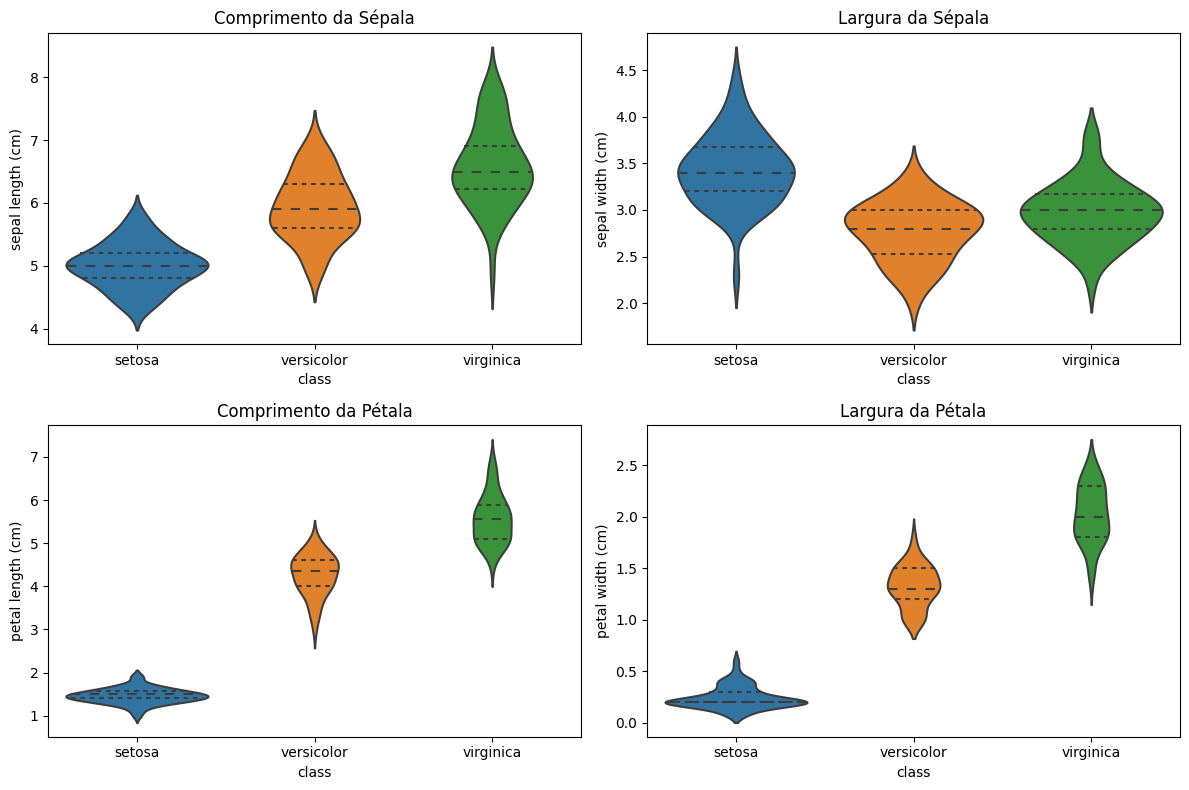

In [16]:
# Criando uma figura com 2 linhas e 2 colunas para os subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Gráfico de violino 1
sns.violinplot(x="class", y="sepal length (cm)", data=iris_df, ax=axs[0, 0], inner='quartile')
axs[0, 0].set_title('Comprimento da Sépala')

# Gráfico de violino 2
sns.violinplot(x="class", y="sepal width (cm)", data=iris_df, ax=axs[0, 1], inner='quartile')
axs[0, 1].set_title('Largura da Sépala')

# Gráfico de violino 3
sns.violinplot(x="class", y="petal length (cm)", data=iris_df, ax=axs[1, 0], inner='quartile')
axs[1, 0].set_title('Comprimento da Pétala')

# Gráfico de violino 4
sns.violinplot(x="class", y="petal width (cm)", data=iris_df, ax=axs[1, 1], inner='quartile')
axs[1, 1].set_title('Largura da Pétala')

# Ajustando o espaçamento entre os subplots
plt.tight_layout()

# Exibindo a figura com os subplots
plt.show()

Neste exemplo, usamos a função subplots para criar uma figura com 2 linhas e 2 colunas de subplots, definindo o tamanho da figura com o parâmetro figsize. Em seguida, acessamos cada subplot usando a notação axs[linha, coluna].

Para cada subplot, criamos um gráfico de violino usando sns.violinplot() e passamos o DataFrame iris_df e as colunas correspondentes. Em seguida, usamos axs[linha, coluna].set_title() para definir um título para cada gráfico.

Por fim, chamamos plt.tight_layout() para ajustar automaticamente o espaçamento entre os subplots e plt.show() para exibir a figura com os subplots.

**Então, a qual conclusão chegamos?**

### **4** - Se preparando para implementar o modelo

Agora que você identificou uma correlação entre os tamanhos de pétalas e sépalas, e como elas podem determinar a classificação da flor, vamos nos preparar para implementar o modelo. Primeiro temos que criar um novo dataset, somente com os dados que vamos utilizar, aqueles que identificamos a correlação.

Obs: Lembre-se que estamos começando o projeto do nosso modelo, então precisamos criar duas "tabelas", uma com os atributos (entradas) e outra com a classificação (classe).

In [17]:
# Selecionando um sub-dataframe com os campos petal_length e petal_width,
# e outro com a variável de classes
entradas = iris_df[['petal length (cm)', 'petal width (cm)']]
classes = iris_df['class']
print(f"Formato das tabelas de dados {entradas.shape} e classes {classes.shape}")

Formato das tabelas de dados (150, 2) e classes (150,)


Com os dois suconjuntos criados precisamos separa-los em dataset de Treino e dataset de Teste.

Como assim você deve estar se perguntando. É simples: Imagine que o modelo é uma criança a qual você está tentando ensinar o que é um cachorro. Um jeito de fazer isso é mostrar vários cachorros para ela, dizendo "Olha só, isso é um cachorro. Ele tem quatro patas, tem rabo e faz "au-au"". Depois de mostrar muitos cachorros para a criança, você mostra outros animais e pergunta: "Isso é um cachorro?". A criança vai lembrar das caracteristicas que aprendeu e vai responder sim ou não.

Para algoritmos de ML é a mesma coisa, nós vamos pegar um dataset de Treino e vamos passar no algoritmo, ja dando as respostas. Ele vai entender a correlação dos dados com a classificação.

No nosso caso, ele vai relacionar as caracteristicas dos atributos com o tipo de flor. Depois vamos passar no algoritmo os dados de Teste, sem as respostas, e ele vai precisar lembrar do treino e classficar esses novos dados.

Normalmente usamos 80% do Dataset para Treino e 20% para Teste, e para isso, vamos usar o **Scikit-Learn** com a função **train_test_split()**. Ele vai pegar o nosso dataset e fazer essa separação de forma aleatória sempre que rodarmos a função.

In [24]:
from sklearn.model_selection import train_test_split

# Separamos 20% para o teste
entradas_treino, entradas_teste, classes_treino, classes_teste = train_test_split(entradas, classes, test_size=0.2)

print(f"Formato das tabelas de dados de treino {entradas_treino.shape} e teste {entradas_teste.shape}")
print()

#Primeiras linhas do dataframe
print(entradas_treino.head())

print()

print(classes_treino.head())

Formato das tabelas de dados de treino (120, 2) e teste (30, 2)

     petal length (cm)  petal width (cm)
86                 4.7               1.5
5                  1.7               0.4
61                 4.2               1.5
109                6.1               2.5
20                 1.7               0.2

86     versicolor
5          setosa
61     versicolor
109     virginica
20         setosa
Name: class, dtype: object


## **5 - Criando e Treinando o Modelo**

Agora vamos treinar o nosso modelo baseado no Algoritmo K-NN!

Treinar um modelo no python é simples se usar o Scikit-Learn e treinar um modelo no Scikit-Learn é mais simples ainda: basta criar o classificador, e chamar o método fit().

Uma observação sobre a sintaxe dos classificadores do scikit-learn:

* O método fit(X,Y) recebe uma matriz ou dataframe X onde cada linha é uma amostra de aprendizado, e um array Y contendo as saídas esperadas do classificador, seja na forma de texto ou de inteiros;

* O método predict(X) recebe uma matriz ou dataframe X onde cada linha é uma amostra de teste, retornando um array de classes;

* Não esqueça de importar as bibliotécas com "from sklearn.neighbors import KNeighborsClassifier";

Faça o treinamento do modelo usando um K = 3

In [19]:
# Importa a biblioteca
from sklearn.neighbors import KNeighborsClassifier

# Cria o classificar KNN
k = 3
modelo = KNeighborsClassifier(n_neighbors=k)

# Cria o modelo de machine learning
modelo.fit(entradas_treino, classes_treino)

KNeighborsClassifier(n_neighbors=3)

Agora que temos o modelo treinado, vamos testar!

Para testar o modelo, vamos usar o método predict() com os dados de teste que separamos. Verifique se as resposta fazem sentido e determine a acurácia do modelo, ou seja, a quatidade de acertos que ele teve. Você vai precisar importar essa bibliotéca também com "from sklearn.metrics import accuracy_score"

In [20]:
# Para obter as previsões, basta chamar o método predict()
classes_encontradas = modelo.predict(entradas_teste)
print("Predição: {}".format(classes_encontradas))
print()

# Para determinar a quantidade de acertos (acuracia)
from sklearn.metrics import accuracy_score
acertos = accuracy_score(classes_teste, classes_encontradas)
print("Acerto médio de classificação: ", acertos)

Predição: ['virginica' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'versicolor' 'setosa' 'virginica' 'versicolor' 'setosa' 'virginica'
 'versicolor' 'virginica' 'virginica' 'setosa' 'virginica' 'virginica'
 'setosa' 'virginica' 'versicolor' 'virginica' 'virginica' 'setosa'
 'virginica' 'setosa' 'versicolor' 'setosa' 'setosa']

Acerto médio de classificação:  0.9666666666666667


### **6** - Melhorando o Modelo

Fizemos o treinamento do algortimo com um K igual a 3 e obtivemos uma determinada acurácia, mas se mudarmos esse valor de K, será que teremos resultados melhores?

Faça um programa que treina o algoritmo com valores de K iniciando em 1 e indo até 26. Verifique a acurácia para cada K, armazenando esses valores em uma lista. Por fim, plote um gráfico com os valores de acurácia obtidos e determine se se houve mudanças de perfomance com K maiores.

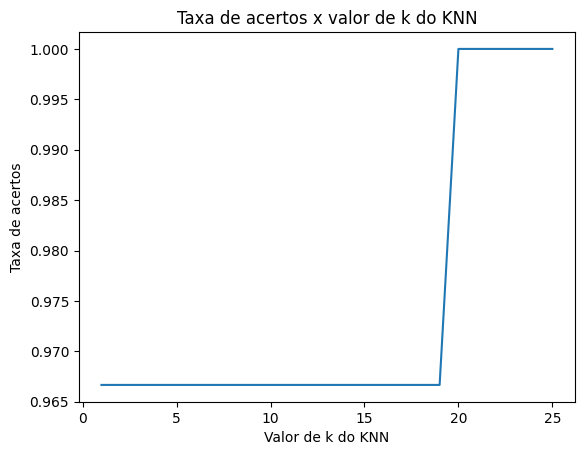

In [21]:
#### Resposta loop for para diferntes k
k_range = list(range(1,26))
acertos = []
for k in k_range:
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(entradas_treino, classes_treino)
    classes_encontradas = modelo.predict(entradas_teste)
    acertos.append(accuracy_score(classes_teste, classes_encontradas))


plt.plot(k_range, acertos)
plt.xlabel('Valor de k do KNN')
plt.ylabel('Taxa de acertos')
plt.title('Taxa de acertos x valor de k do KNN')
plt.show()

### **7 -** Exportando o Modelo

Por fim, vamos exportar o nosso modelo para ultizar em nossas aplicações. Para fazer isso, usaremos o Pickle, com o método dump()

In [22]:
import pickle

with open('knn_model.pkl', 'wb') as file:
  pickle.dump(modelo,file)

### **8 -** Importando o Modelo

Agora que temos um arquivo pkl, que é o nosso modelo treinado no formato black box, podemos carrega-lo em nossas aplicações. Por exemplo:

Podemos criar um aplicativo que usa a camera do smartphone para tirar fotos de flores. Teremos um algoritmo que identifica os tamahos de Sépala e Pétala através de Visão Computacional, em seguida, esses tamanhos são passados para o nosso modelo, que identifica qual é a espécie da flor.

In [33]:
# Carregando o modelo salvo
with open('/content/knn_model.pkl', 'rb') as arquivo:
    modelo = pickle.load(arquivo)

dados_de_teste = [[4.2, 1.5]]  # Lista com as características de teste

# Criando o DataFrame com duas colunas
df = pd.DataFrame(dados_de_teste, columns=['petal length (cm)', 'petal width (cm)'])

# Utilizando o modelo carregado
resultado = modelo.predict(df)

print(resultado)

['versicolor']


## **Exercicio**

Agora implemente esse mesmo roteiro com o dataset 'breast_cancer'